In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Entrenamiento del modelo de clasificación de imágenes usando una red neuronal convolucional

Se definen algunos diccionarios que serán usados posterioremente

In [19]:
dictLabelY = {
    'Juice' : 0,
    'Milk' : 1,
    'Oat-Milk' : 2,
    'Oatghurt' : 3,
    'Sour-Cream' : 4,
    'Sour-Milk' : 5,
    'Soy-Milk' : 6,
    'Soyghurt' : 7,
    'Yoghurt' : 8
    }

Se crea una función que lea todas las imágenes contenidas en una carpeta y se les asigna su respectiva etiqueta.

In [ ]:
def cargar_imagenes(directorio_principal, dictLabelY):
    lista_imagenes = []
    lista_etiquetas = []

    for carpeta, subcarpetas, archivos in os.walk(directorio_principal):
        for archivo in archivos:
            if archivo.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                ruta_imagen = os.path.join(carpeta, archivo)
                # Carga la imagen usando OpenCV
                imagen = cv2.imread(ruta_imagen)
                imagen_resized = cv2.resize(imagen,(180,180))

                ruta = ruta_imagen.replace("\\", "/").split("/")
                etiqueta = ruta[8]
                if imagen is not None:
                    # Almacena el nombre y la imagen en la lista
                    lista_imagenes.append(imagen_resized)
                    lista_etiquetas.append(etiqueta)

    image_array = np.array(lista_imagenes)
    X = image_array/255.0

    lista_reetiquetas = [dictLabelY[itLabel] for itLabel in lista_etiquetas]
    Y = np.array(lista_reetiquetas)

    return X, Y

Se carga las imágenes correspondientes para el conjunto de train, test y validation.

In [ ]:
X_train, y_train = cargar_imagenes("/content/drive/MyDrive/1. Máster AI aplicada - UHem/Sistemas Cognitivos Artificiales/data/train", dictLabelY=dictLabelY)
X_test, y_test = cargar_imagenes("/content/drive/MyDrive/1. Máster AI aplicada - UHem/Sistemas Cognitivos Artificiales/data/test", dictLabelY=dictLabelY)
X_val, y_val = cargar_imagenes("/content/drive/MyDrive/1. Máster AI aplicada - UHem/Sistemas Cognitivos Artificiales/data/val", dictLabelY=dictLabelY)

Se modifican la estructura de la variables dependiente de cada conjunto de datos.

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(dictLabelY))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(dictLabelY))
y_val = tf.keras.utils.to_categorical(y_val, num_classes=len(dictLabelY))

Se crea un *augmentation* de las imágenes para mejorar las métricas de rendimiento del modelo.

In [ ]:
data_augmentation = models.Sequential(
  [
    layers.RandomFlip("horizontal",  input_shape=(180, 180, 3)),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.3),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Se define el modelo de red neuronal convolucional para la clasificación de imágenes bajo la siguiente estructura

In [ ]:
model = models.Sequential([
    data_augmentation,

    layers.Conv2D(filters = 86 , kernel_size = (3,3),activation = 'relu',input_shape= (180,180,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 43 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 43 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),

    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(86, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(len(dictLabelY), activation = 'softmax'),
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilación del modelo
model.compile(
optimizer = 'adam',
    loss= 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test,y_test))

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.2348 - loss: 2.0044 - val_accuracy: 0.3367 - val_loss: 1.7811
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 155s 6s/step - accuracy: 0.3268 - loss: 1.7778 - val_accuracy: 0.3508 - val_loss: 1.6914
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.3566 - loss: 1.6789 - val_accuracy: 0.3675 - val_loss: 1.5042
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.4206 - loss: 1.5327 - val_accuracy: 0.4917 - val_loss: 1.3885
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.4780 - loss: 1.4179 - val_accuracy: 0.5711 - val_loss: 1.1789
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.5400 - loss: 1.2393 - val_accuracy: 0.6082 - val_loss: 1.0193
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.5998 - loss: 1.0977 - val_accuracy: 0.6172 - val_loss: 1.0504
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.6303 - loss: 1.0147 - val_accuracy: 0.6428 - v

Evauación del modelo en los conjuntos de train y test

In [ ]:
# Evaluación del modelo
train_loss, train_accuracy = model.evaluate(X_train,y_train)
test_loss, test_accuracy = model.evaluate(X_test,y_test)
val_loss, val_accuracy = model.evaluate(X_val,y_val)

print(f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9279 - loss: 0.1813
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7940 - loss: 0.6745
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7058 - loss: 0.7573
Train Accuracy: 0.8738, Test Accuracy: 0.8182


Se muestra el comportamiento del modelo durante el entrenamiento del modelo con 20 epochs. Y se presenta el *accuracy* y el *loss*

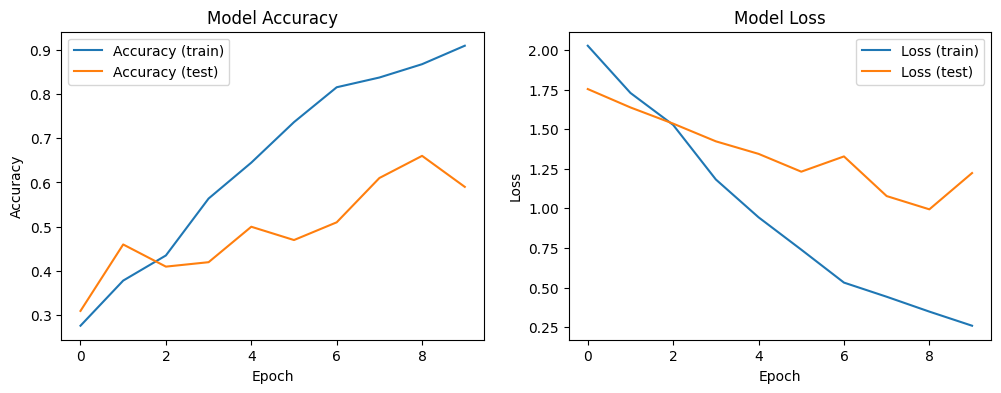

In [ ]:
# Gráfica de la evolución del modelo
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (test)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (test)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se almacena el modelo creado, de manera local, para usarlo en notebooks posteriores. En este caso para el aplicativo diseñado con Streamlit.

In [ ]:
model.save('mi_modelo.keras')
print("Modelo guardado en formato SavedModel")

Modelo guardado en formato SavedModel


Se almacena el modelo creado, en google drive personal, para usarlo en notebooks posteriores. En este caso para el aplicativo diseñado con Streamlit.

In [ ]:
ruta_modelo = '/content/drive/MyDrive/1. Máster AI aplicada - UHem/Sistemas Cognitivos Artificiales/modeloCNNproducts.keras'

model.save(ruta_modelo)
print(f'Modelo guardado en: {ruta_modelo}')

Modelo guardado en: /content/drive/MyDrive/1. Máster AI aplicada - UHem/Sistemas Cognitivos Artificiales/modeloCNNproducts.keras


## Carga del modelo previamente entrenado para realizar predicciones de nuevas imágenes

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
from tensorflow.keras.models import load_model
modelCNN = load_model('/content/mi_modelo.keras')

Se definen funciones que ayudan a la carga rápida de las imágenes y predicción de su etiqueta respectiva.

In [14]:
def leerImagenPredict(ruta_imagen):
    imagen = cv2.imread(ruta_imagen)

    if imagen is not None:
      imagen_resized = cv2.resize(imagen,(180,180))
      image_array = np.array(imagen_resized)
      X = image_array/255.0

      return X.reshape(1, 180, 180, 3)


def obtener_key(diccionario, label):
    for key, value in diccionario.items():
        if value == label:
            return key
    return "Error: La etiqueta no existe en el diccionario."

obtener_key(dictLabelY, 1)

Nueva imagen usada para predecirla.

In [15]:
imgPredict = leerImagenPredict("/content/img/Arla-Standard-Milk_005.jpg")

In [56]:
# Realizar la predicción
predicciones = modelCNN.predict(imgPredict)

etiqueta_predicha = np.argmax(predicciones, axis=1)
idEtiqueta = etiqueta_predicha[0]
etiquetaProdcuto = obtener_key(dictLabelY, idEtiqueta)
etiquetaProdcuto

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


'Milk'

Se muestra la tabla de probabilidades de cada categoría.

In [50]:
import pandas as pd
pd.DataFrame({'Producto' : list(dictLabelY_es.keys()),
              'Probabilidad' : predicciones.T.flatten()})

,Producto,Probabilidad
0,Jugo,1.443800e-03
1,Leche,9.953145e-01
2,Leche de avena,9.683145e-08
3,Yogur de avena,4.080133e-04
4,Crema agria,3.624214e-05
5,Leche agria,8.790812e-08
6,Leche de soja,8.296442e-06
7,Yogur de soja,1.299992e-06
8,Yogur,2.787615e-03


## Despliegue del aplicativo para la predicción de imágenes nuevas

In [32]:
!pip install -q streamlit
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 3s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [37]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://tangy-actors-worry.loca.lt
^C
